<a href="https://colab.research.google.com/github/EunjinAn/python_study/blob/main/Crown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
# data read
data = pd.read_csv('crown.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350398 entries, 0 to 350397
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transport_date      350398 non-null  object
 1   transport_time      350398 non-null  int64 
 2   sender_id           350398 non-null  int64 
 3   recipient_country   350398 non-null  object
 4   num_animals         350398 non-null  int64 
 5   reporting_datetime  350398 non-null  object
dtypes: int64(3), object(3)
memory usage: 16.0+ MB


In [8]:
data.head()

,transport_date,transport_time,sender_id,recipient_country,num_animals,reporting_datetime
0,2012-05-31,1315,80,PL,349,2012-06-01 15:12:26
1,2012-05-31,1315,80,PL,299,2012-06-01 15:15:34
2,2012-05-29,800,288,BE,97,2012-06-04 10:15:57
3,2012-05-29,800,288,BE,24,2012-06-04 10:15:57
4,2012-05-31,800,288,FR,12,2012-06-04 10:15:57


### The Goal of analysis


I assumed above columns name is below concept.

- transport time is cost!
- num_animals income!
- profit = income -cost



In [39]:
# which country is the most important customer 
data_group_num = data.groupby('recipient_country')['num_animals'].sum()

In [41]:
data_group_num.nlargest().head()

recipient_country
DE    67724901
PL    55326073
IT     8484360
RO     1692099
HR     1460582
Name: num_animals, dtype: int64

In [42]:
total_animals = sum(data['num_animals'])

In [44]:
pc_animals = [x*100 /total_animals for x in data_group_num]

In [56]:
# German and Finland account for 88% of total order.
pc_animals.sort(reverse = True)
print(pc_animals)

[48.41545959606571, 39.5517337403045, 6.065334651112684, 1.2096547880822033, 1.0441469498455354, 0.8490607791017853, 0.7409295442975866, 0.6063111361345989, 0.40805445409975744, 0.19807867587667194, 0.19686337278876764, 0.13370264154204348, 0.12489955788060035, 0.0712961130939893, 0.06847375039337394, 0.053713536948691784, 0.04488328768881315, 0.028398773627645618, 0.026813875424184563, 0.026475020327910076, 0.023789200503641618, 0.017842079098773552, 0.011797733446873144, 0.011273723350735591, 0.009294209085790326, 0.007907333797240734, 0.007697872735619585, 0.007492700979014568, 0.006137995478085973, 0.0055260546291177, 0.003402848646131986, 0.003256297391414117, 0.002123205982985714, 0.0020760236278082535, 0.0019916672958243094, 0.0018243844001951319, 0.0014983972189690426, 0.0011931416786542615, 0.0010387266980734823, 0.0009407875668717843, 0.0009364982618556515, 0.0009086177792507887, 0.000753487914500654, 0.0006283831848634487, 0.0006162301539844058, 0.0005390226636940162, 0.0005

In [22]:
# to calculating costs, I imported distance dataset.
dis = pd.read_excel('distance.xls')

In [23]:
dis.head()

,Country,Distance,Mileage
0,Distance from Andorra to Denmark,"1,633 km","1,015 miles"
1,Distance from United Arab Emirates to Denmark,"5,112 km","3,176 miles"
2,Distance from Afghanistan to Denmark,"5,004 km","3,109 miles"
3,Distance from Antigua and Barbuda to Denmark,"7,287 km","4,528 miles"
4,Distance from Anguilla to Denmark,"7,260 km","4,511 miles"


In [24]:
dis['country_name'] = [i[14:] for i in dis['Country']] 

In [25]:
dis['country_name']

0                   Andorra to Denmark
1      United Arab Emirates to Denmark
2               Afghanistan to Denmark
3       Antigua and Barbuda to Denmark
4                  Anguilla to Denmark
                    ...               
245                  Denmark to Panama
246                 Denmark to Reunion
247            Denmark to Saint Helena
248              Denmark to San Marino
249                  Denmark to Taiwan
Name: country_name, Length: 250, dtype: object

<AxesSubplot:title={'center':'Order by countries'}>

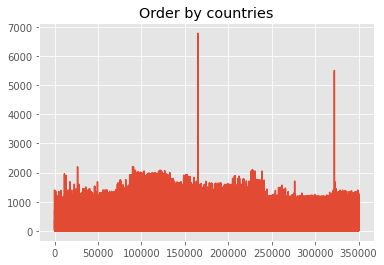

In [10]:
plt.style.use('ggplot')

data['num_animals'].plot(label='num_animals', title='Order by countries')

In [ ]:
data.hist()

In [ ]:
import altair as alt

In [ ]:
source = pd.DataFrame(data.groupby('recipient_country')['transport_time'].median().nlargest(20)).reset_index()

source['transport_time'] = [d.days for d in source['transport_time']]

alt.Chart(source).mark_bar().encode(
    x='length',
    y='place:N',
    tooltip=['transport_time']
).interactive()

I deep into the following,

1. which country is the most important customer?
2. Amounts of the customers' order by a temperture(wheather)
3. Predict amount of the next order by customers.